In [12]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from bing_image_downloader import downloader
downloader.download('black people photos', limit=100,  output_dir='dataset', adult_filter_off=True, force_replace=False, filter='photo', timeout=60, verbose=True)


[%] Downloading Images to /content/dataset/black people photos


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://arts.ufl.edu/site/assets/files/143003/lamyportrait.1840x1328p50x50.png
[%] File Downloaded !

[%] Downloading Image #2 from https://external-preview.redd.it/0dloyiDBJwceAHT9xdC3WRxNFaQ_2Ngv9QsAqrQDqGw.jpg?auto=webp&amp;s=84d7b593f3783b632bd331ec51e4d69d9df6aaac
[!] Issue getting: https://external-preview.redd.it/0dloyiDBJwceAHT9xdC3WRxNFaQ_2Ngv9QsAqrQDqGw.jpg?auto=webp&amp;s=84d7b593f3783b632bd331ec51e4d69d9df6aaac
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #2 from https://atlantablackstar.com/wp-content/uploads/2013/09/richest-black-people-black-college-students.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://atlantablackstar.com/wp-content/uploads/2014/04/936full-djimon-hounsou.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.gannett-cdn.com/-mm-/786b5129f07f170682e9f49d0bb6

In [14]:
downloader.download('white people photos', limit=100,  output_dir='dataset', adult_filter_off=True, force_replace=False, filter='photo', timeout=60, verbose=True)


[%] Downloading Images to /content/dataset/white people photos


[!!]Indexing page: 1

[%] Indexed 36 Images on Page 1.


[%] Downloading Image #1 from https://atlantablackstar.com/wp-content/uploads/2017/09/White-People.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://static01.nyt.com/images/2017/08/22/opinion/22valdaryWeb/22valdaryWeb-videoSixteenByNineJumbo1600.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://media.salon.com/2015/07/white_people.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://pearlsofprofundity.files.wordpress.com/2013/02/white-people-2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://pbs.twimg.com/profile_images/741736645091688448/bnGuX7XR_400x400.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://cdn.vox-cdn.com/thumbor/Yudq3ra9GPQ2Bb1ulHGLOzoWsrU=/0x102:4000x2769/1200x800/filters:focal(0x102:4000x2769)/cdn.vox-cdn.com/uploads/chorus_image/image/10540367/20130327_lbm_ag5_338.0.jpg
[%] Fi

In [15]:
downloader.download('black people photos', limit=1,  output_dir='test', adult_filter_off=True, force_replace=False, filter='photo', timeout=60, verbose=True)


[%] Downloading Images to /content/test/black people photos


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://arts.ufl.edu/site/assets/files/143003/lamyportrait.1840x1328p50x50.png
[%] File Downloaded !



[%] Done. Downloaded 1 images.


In [16]:
downloader.download('white people photos', limit=1,  output_dir='test', adult_filter_off=True, force_replace=False, filter='photo', timeout=60, verbose=True)


[%] Downloading Images to /content/test/white people photos


[!!]Indexing page: 1

[%] Indexed 1 Images on Page 1.


[%] Downloading Image #1 from https://atlantablackstar.com/wp-content/uploads/2017/09/White-People.jpg
[%] File Downloaded !



[%] Done. Downloaded 1 images.


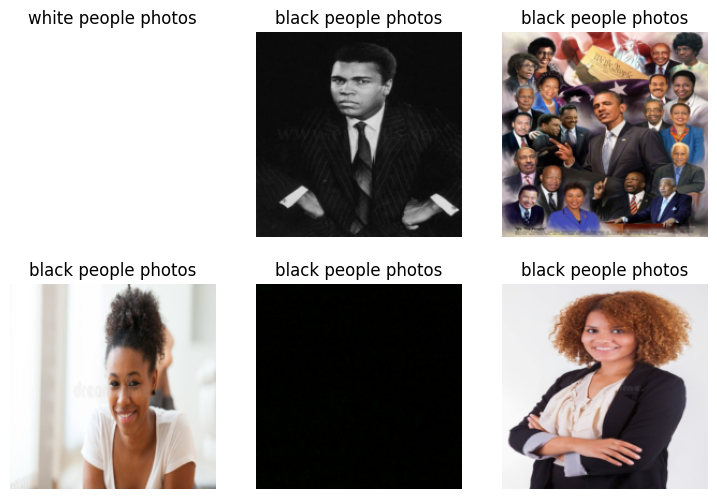

In [17]:
from fastcore.all import *
from fastai.vision.all import *
path = Path('dataset')


failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [18]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.237229,0.639077,0.404762,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.728926,0.643323,0.380952,00:45
1,0.560538,0.771016,0.333333,00:46
2,0.482766,0.790401,0.333333,00:47
3,0.393673,0.789632,0.357143,00:48


In [19]:
is_black,_,probs = learn.predict(PILImage.create('/content/test/black people photos/Image_1.png'))
print(f"This is a: {is_black}.")
print(f"Probability it's a black person: {probs[0]:.4f}")

This is a: black people photos.
Probability it's a black person: 0.9915


In [22]:
learn.export('model.pkl')